# Trabajo práctico 1 



**Human activity recognition**

https://archive.ics.uci.edu/ml/datasets/Human+Activity+Recognition+Using+Smartphones

https://github.com/FIUBA-Posgrado-Inteligencia-Artificial/intro_ia/tree/cohorte-6/clase_2/jupyterbooks/data

**MNIST**

    from sklearn.datasets import fetch_openml
    X, y = fetch_openml("mnist_784", version=1, return_X_y=True, as_frame=False)


Deben maximizarse la cantidad de operaciones vectorizadas en las implementaciones.


## Ejercicio 1 - Implementar clase PCA con numpy
**Dataset** Human activity recognition

Tomar las primeras 63 componentes principales y calcular la varianza contemplada. Realizar las operaciones internas con numpy.linalg. 

In [2]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

In [3]:
X_train = np.loadtxt("X_train.txt")
y_train = np.loadtxt( "y_train.txt").astype(int)

A continuación se define la función para estandarizar los datos. Tomamos los valores de cada celda, restamos el valor medio de la columna y lo dividimos por la desviación. 

In [4]:
def estandarizar_datos(arr):
    filas, columnas = arr.shape
    std_arr = np.zeros(shape=(filas, columnas))
    aux = np.zeros(filas)   
    for c in range(columnas):      
        media = np.mean(arr[:,c])
        desviacion= np.std(arr[:,c])
        aux = np.empty(0)  
        for i in arr[:,c]:       
            aux = np.append(aux, ((i - media) / desviacion))
 
        std_arr[:,c] = aux
    
    return std_arr

In [5]:
X_std=estandarizar_datos(X_train)

Ahora se calcula la matriz de covarianza del conjunto de datos, multiplicando la matriz de caracteristicas por su transpuesta. 

In [6]:
cov_matriz = np.cov(X_std.T)

Calculamos los autovalores y autovectores de la matriz de covarianza

In [7]:
a_val, a_vec = np.linalg.eig(cov_matriz)

Ordenamos los autovectores en el sentido de los autovalores decrecientes para luego quedarnos con los primeros 63

In [8]:
idx = a_val.argsort()[::-1]   
a_val = a_val[idx]
a_vec = a_vec[:,idx]

In [9]:
m = 63
a_vec_red = a_vec[:, :m]
a_val_red=a_val[0:m]
X_pca = np.dot(X_std,a_vec_red[:, :m])

Vemos la diferencia de dimensiones en las matrices:

In [10]:
print("Matriz original",X_train.shape)
print("Matriz PCA",X_pca.shape)

Matriz original (7352, 561)
Matriz PCA (7352, 63)


Calculamos la varianza contemplada con los 63 componentes principales, calculando la acumulada sobre la total:

In [11]:
var_acum = np.sum(a_val_red)
var_total=np.sum(a_val)
var_contemplada=(var_acum/var_total)*100
print("Varianza contemplada",np.real(var_contemplada))

Varianza contemplada 90.0534506614594


Graficamos la varianza para comparar con el grafico resultante de la resolución con la libreria sklearn

In [12]:
varianza = []
for i in a_val:
     varianza.append((i/sum(a_val))*100)

c:\python39\lib\site-packages\matplotlib\cbook\__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


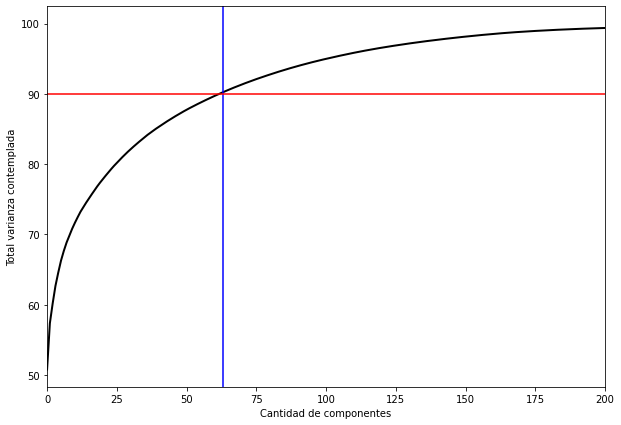

In [13]:
plt.figure(figsize=(10,7))
plt.plot(np.cumsum(varianza), color='k', lw=2)
plt.xlabel('Cantidad de componentes')
plt.ylabel('Total varianza contemplada')
plt.xlim(0, 200)
plt.axvline(63, c='b')
plt.axhline(90, c='r')
plt.show();

## Ejercicio 2 - Implementar clase KMeans con numpy
**Dataset** Human activity recognition

Implementar kmeans con numpy. Agrupar el dataset transformado (ejercicio de PCA) y agrupar en clusters de k=2 y 6. Graficar los casos de k=2 y k=6 con las primeras dos componentes principales.

Para iniciar debemos seleccionar k elementos aleatorios de X como posiciones iniciales de los centroides. 

In [14]:
k=2

In [16]:
Centroid = X_pca[np.random.choice(X_pca.shape[0], k, replace=False), :]
print("Dimension de los Centroides",Centroid.shape)


Dimension de los Centroides (2, 63)


Ahora tenemos que calcular la distancia entre todos los puntos en X y los centroides, para luego agrupar los que tienen menor distancia


In [18]:
distancias=np.sqrt(np.sum((X_pca-Centroid[:, None])**2,axis=2))
cluster=np.argmin(distancias, axis=0)

El proximo paso es recalcular los centroides a partir de la media de las filas de X

In [19]:
for i in range(Centroid.shape[0]):
        Centroid[i] = np.mean(X_pca[cluster==i],axis=0)

Luego esto se debe repetir hasta que la posición de los centroides no varíe mayor a un valor seteado

Ahora juntamos todas las operaciones en una funcion kmeans para luego poder variar los parametros.

In [24]:
def kmeans(X,k,iteraciones):
    centroid = X[np.random.choice(X.shape[0], k, replace=False), :]
    
    for i in range(iteraciones):
        distancias=np.sqrt(np.sum((X-centroid[:, None])**2,axis=2))
        cluster=np.argmin(distancias, axis=0)
        for i in range(centroid.shape[0]):
            centroid[i] = np.mean(X[cluster==i],axis=0)
            
    return centroid, cluster

Probamos en un inicio con una iteracion.

In [33]:
centroide, clusters=kmeans(X_pca,2,1)

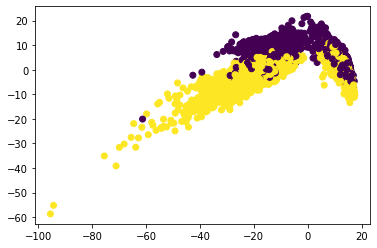

In [34]:
plt.scatter(X_pca[:, 0], X_pca[:, 1],c=clusters)

In [36]:
centroide, clusters=kmeans(X_pca,2,10)

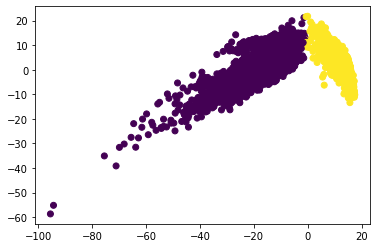

In [37]:
plt.scatter(X_pca[:, 0], X_pca[:, 1],c=clusters)

Podemos ver que luego de 10 iteraciones tenemos mejores resultados

Ahora mostramos para k=6

In [38]:
centroides,cluster_6=kmeans(X_pca,6,1)

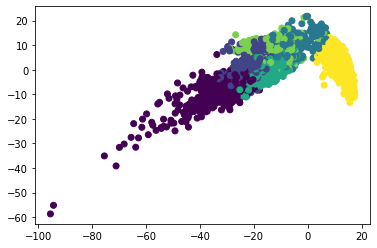

In [39]:
plt.scatter(X_pca[:, 0], X_pca[:, 1],c=cluster_6)

In [41]:
centroides,cluster_6=kmeans(X_pca,6,10)

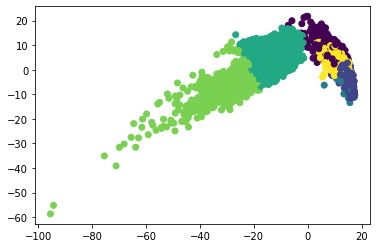

In [43]:
plt.scatter(X_pca[:, 0], X_pca[:, 1],c=cluster_6)

In [46]:
centroides,cluster_6=kmeans(X_pca,6,1000)

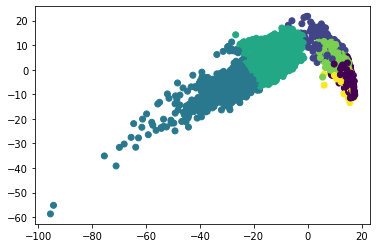

In [47]:
plt.scatter(X_pca[:, 0], X_pca[:, 1],c=cluster_6)

En ambos casos podemos ver como mejora notablemente la agrupación al realizar mayor numero de iteraciones

## Ejercicio 3 - Comparar los ejercicios anteriores con lo visto en las clases

Podemos ver que relizando el analisis de componentes principales con numpy podemos se llegan a los mismos resultados
que se mostraron en clase, realizado con la libreria sklearn. Vemos que tomando los primeros 63 autovectores como componentes principales contemplamos la misma varianza, un 90%. En el segundo punto, tambien se lograron buenos resultados realizando la agrupacion en cluster por pasos con la libreria numpy. Y tambien se puede diferenciar los cambios cuando vamos sumando iteraciones. Por otro lado, cuando vemos la grafica de puntos de los datos la vemos invertida a la trabajada con sklearn, pero esto es por alguna cuestion propia de la libreria que realiza una inversion que se puede setear, es decir activar o desactivar esa funcion. Por ultimo, considero que estos ejercicios son una buena practica para comprender a fondo los métodos, ya que en la cotidianidad tendemos a utilizar funciones o librerias ya implementadas. 

## Ejercicio 4 - PCA + KMeans

**Dataset**: MNIST

Con las implementaciones de sklearn, tomar las componentes principales que capturen el 90% de la varianza y aplicar kmeans para agrupar los dígitos en 10 clusters. Analizar los resultados. 

In [99]:
import tensorflow as tf
from sklearn import metrics
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [100]:
from sklearn.datasets import fetch_openml
X, y = fetch_openml("mnist_784", version=1, return_X_y=True, as_frame=False)

In [143]:
print('Formato de los datos: {}'.format(X.shape))
print('Formato de las etiquetas: {}'.format(y.shape))

Formato de los datos: (70000, 784)
Formato de las etiquetas: (70000,)


Este conjunto de datos de dígitos escritos a mano del 0 al 9. La información de un solo dígito se almacena en forma de matriz (784,1) donde el un solo elemento de una matriz de (784,1) representa un solo píxel de una imagen de 28x28.
Hacemos un show de dos imagenes del dataset.

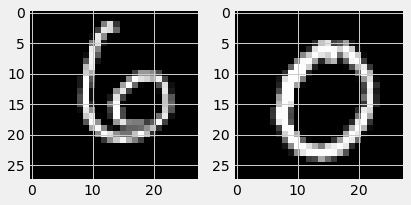

In [141]:
fig, (ax1, ax2) = plt.subplots(1, 2)
ax1.imshow(X[60100, :].reshape((28, 28)), cmap='gray')
ax2.imshow(X[60101, :].reshape((28, 28)), cmap='gray')

Comenzamos a trabajar sobre el dataset. Primero estandarizamos los datos.

In [102]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

Aplicamos la funcion PCA para obtener las componentes principales que capturen el 90% de la varianza

In [136]:
pca = PCA(n_components=0.90,random_state=17).fit(X_scaled)
X_pca = pca.transform(X_scaled)

In [134]:
print("Dimension matriz original",X.shape)
print("Dimension matriz PCA",X_pca.shape)

Dimension matriz original (70000, 784)
Dimension matriz PCA (70000, 225)


Vemos que utilizando 225 componentes principales, capturamos el 90% de la varianza 

Ahora aplicamos kmeans para agrupar los dígitos en 10 clusters

In [144]:
kmeans = KMeans(n_clusters=10, n_init=100, random_state=17)
kmeans.fit(X_pca)
cluster_labels = kmeans.labels_

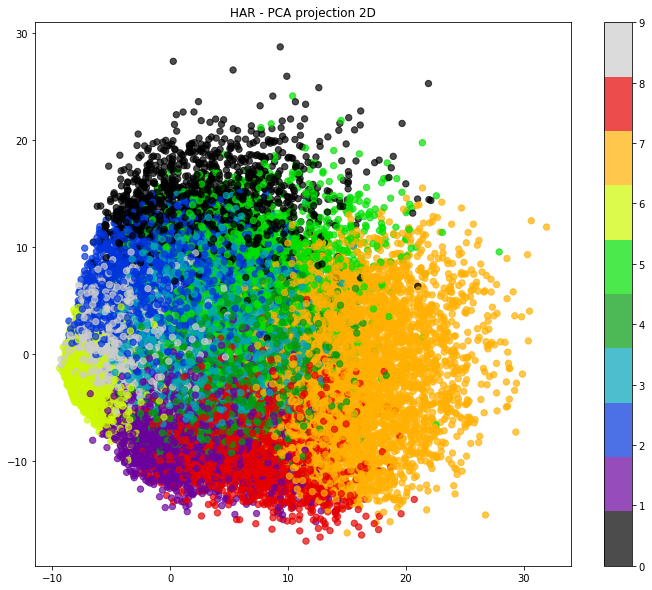

In [208]:
plt.figure(figsize=(12,10))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=cluster_labels, alpha=0.7, s=40, cmap=plt.cm.get_cmap('nipy_spectral', 10))
plt.rcParams['axes.grid'] = False 
plt.colorbar()
plt.title('HAR - PCA projection 2D');

Observando el gráfico podemos ver que hay mucha superposición entre las clases, lo que significa que PCA no es muy bueno para el conjunto de datos de alta dimensión. Muy pocas clases pueden separarse pero la mayoría de ellas son mixtas. PCA se utiliza principalmente para la reducción de la dimensionalidad, no para la visualización